In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


In [2]:
import numpy as np
import pandas as pd


这段代码之前是读取1个站点的数据，现在请你读取6个站点的数据。然后，将6个站点的数据作为热力图的Y轴刻度合并：

004-MOD09GA-station-merged-异常nan_兰山嘴.csv

004-MOD09GA-station-merged-异常nan_拖山.csv

004-MOD09GA-station-merged-异常nan_乌龟山南.csv

004-MOD09GA-station-merged-异常nan_五里湖心.csv

004-MOD09GA-station-merged-异常nan_胥湖心.csv

004-MOD09GA-station-merged-异常nan_锡东水厂.csv


/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

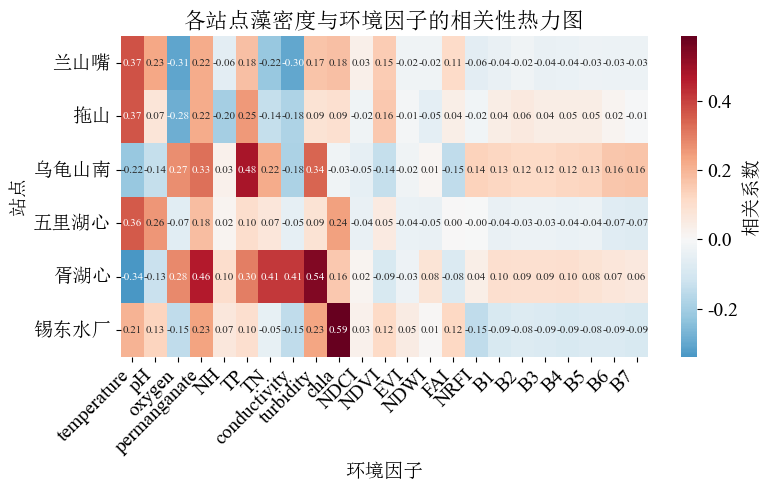

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

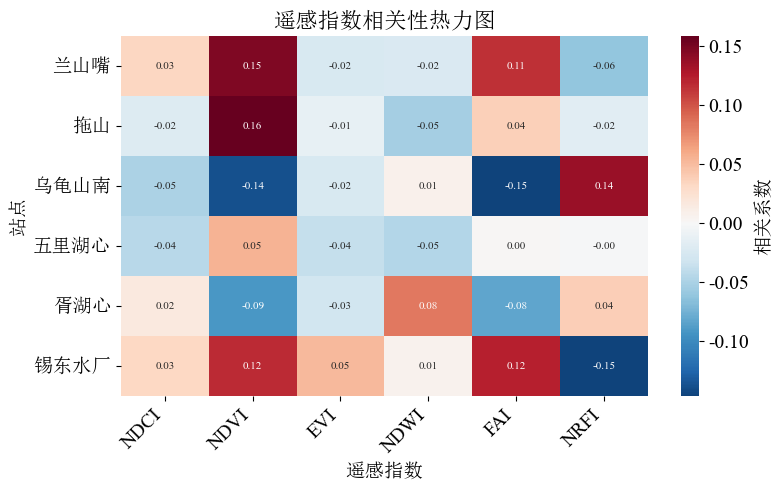

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

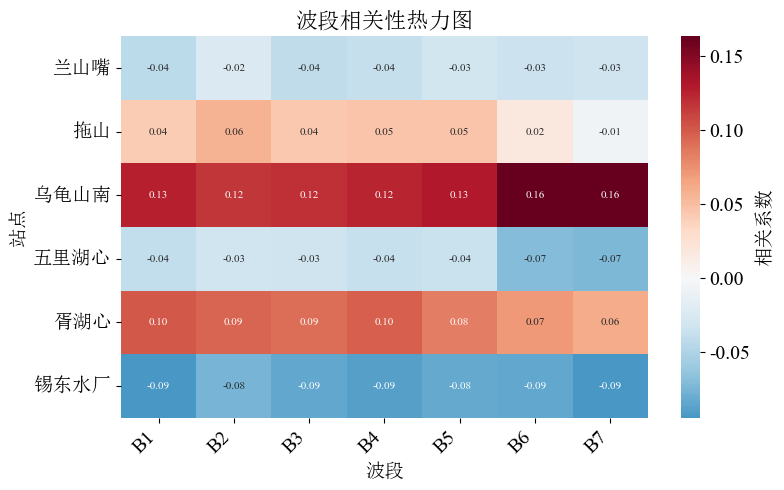

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 读取6个站点的数据
stations = ['兰山嘴', '拖山', '乌龟山南', '五里湖心', '胥湖心', '锡东水厂']
dfs = []
for station in stations:
    filename = f'004-MOD09GA-station-merged-异常nan_{station}.csv'
    df = pd.read_csv(filename)
    df['station'] = station  # 添加站点标识列
    dfs.append(df)

# 合并所有数据
merged_df = pd.concat(dfs, axis=0, ignore_index=True)

# 计算每个站点的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'chla', 'NDCI', 'NDVI', 'EVI', 'NDWI', 'FAI', 'NRFI',
                   'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']

# 重命名列名
column_mapping = {
    'ndci': 'NDCI',
    'ndvi': 'NDVI', 
    'evi': 'EVI',
    'ndwi': 'NDWI',
    'fai': 'FAI',
    'nrfi': 'NRFI',
    'b1': 'B1',
    'b2': 'B2', 
    'b3': 'B3',
    'b4': 'B4',
    'b5': 'B5',
    'b6': 'B6',
    'b7': 'B7'
}
merged_df = merged_df.rename(columns=column_mapping)

# 创建一个空的DataFrame来存储每个站点的相关性
station_correlations = pd.DataFrame(index=stations, columns=correlation_vars)

# 计算每个站点的相关性并确保数据为数值型
for station in stations:
    station_data = merged_df[merged_df['station'] == station]
    # 将所有列转换为数值类型
    numeric_data = station_data[correlation_vars + ['density']].apply(pd.to_numeric, errors='coerce')
    correlations = numeric_data.corr()['density']
    station_correlations.loc[station] = correlations[correlation_vars]
# 确保所有数据都是浮点数
station_correlations = station_correlations.astype(float)
# 创建热力图
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(station_correlations,
            cmap='RdBu_r', 
            center=0,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': '相关系数'},
            xticklabels=correlation_vars,
            yticklabels=stations,
            annot_kws={'fontproperties': english_font, 'size': 8})  # 设置矩阵中数字的字体和大小

plt.title('各站点藻密度与环境因子的相关性热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('环境因子', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)

# 调整x轴标签的角度
plt.xticks(rotation=45, ha='right')
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)  # 设置y轴标签为水平方向

# 设置colorbar的字体
cbar = heatmap.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()

# 计算遥感指数与藻密度的相关性
rs_vars = ['NDCI', 'NDVI', 'EVI', 'NDWI', 'FAI', 'NRFI']
rs_correlations = pd.DataFrame(index=stations, columns=rs_vars)
for station in stations:
    station_data = merged_df[merged_df['station'] == station]
    numeric_data = station_data[rs_vars + ['density']].apply(pd.to_numeric, errors='coerce')
    correlations = numeric_data.corr()['density']
    rs_correlations.loc[station] = correlations[rs_vars]
# 确保数据为浮点型
rs_correlations = rs_correlations.astype(float)

# 可视化遥感指数相关性热力图
plt.figure(figsize=(8, 5))
heatmap1 = sns.heatmap(rs_correlations,
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': '相关系数'},
            xticklabels=rs_vars,
            yticklabels=stations,
            annot_kws={'fontproperties': english_font, 'size': 8})

plt.title('遥感指数相关性热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('遥感指数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)

# 调整标签
plt.xticks(rotation=45, ha='right')
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)  # 设置y轴标签为水平方向

# 设置colorbar的字体
cbar = heatmap1.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()

# 计算波段与藻密度的相关性
band_vars = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
band_correlations = pd.DataFrame(index=stations, columns=band_vars)
for station in stations:
    station_data = merged_df[merged_df['station'] == station]
    numeric_data = station_data[band_vars + ['density']].apply(pd.to_numeric, errors='coerce')
    correlations = numeric_data.corr()['density']
    band_correlations.loc[station] = correlations[band_vars]
# 确保数据为浮点型
band_correlations = band_correlations.astype(float)

# 可视化波段相关性热力图
plt.figure(figsize=(8, 5))
heatmap2 = sns.heatmap(band_correlations,
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f', 
            cbar_kws={'label': '相关系数'},
            xticklabels=band_vars,
            yticklabels=stations,
            annot_kws={'fontproperties': english_font, 'size': 8})

plt.title('波段相关性热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('波段', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)

# 调整标签
plt.xticks(rotation=45, ha='right')
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)  # 设置y轴标签为水平方向

# 设置colorbar的字体
cbar = heatmap2.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()



水质参数PCA双标图分析:
兰山嘴
拖山
乌龟山南
五里湖心
胥湖心
锡东水厂


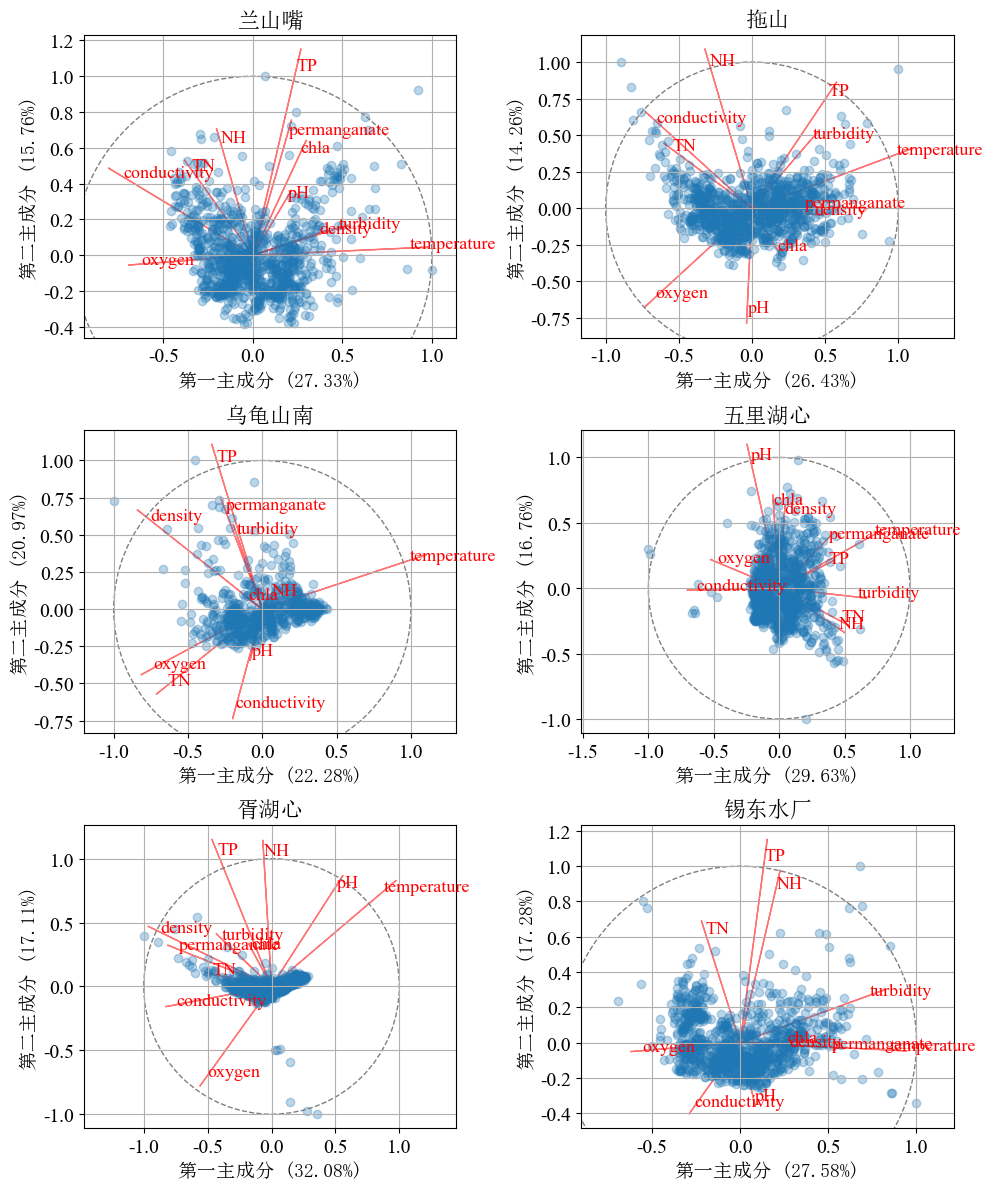


遥感指数PCA双标图分析:
兰山嘴
拖山
乌龟山南
五里湖心
胥湖心
锡东水厂


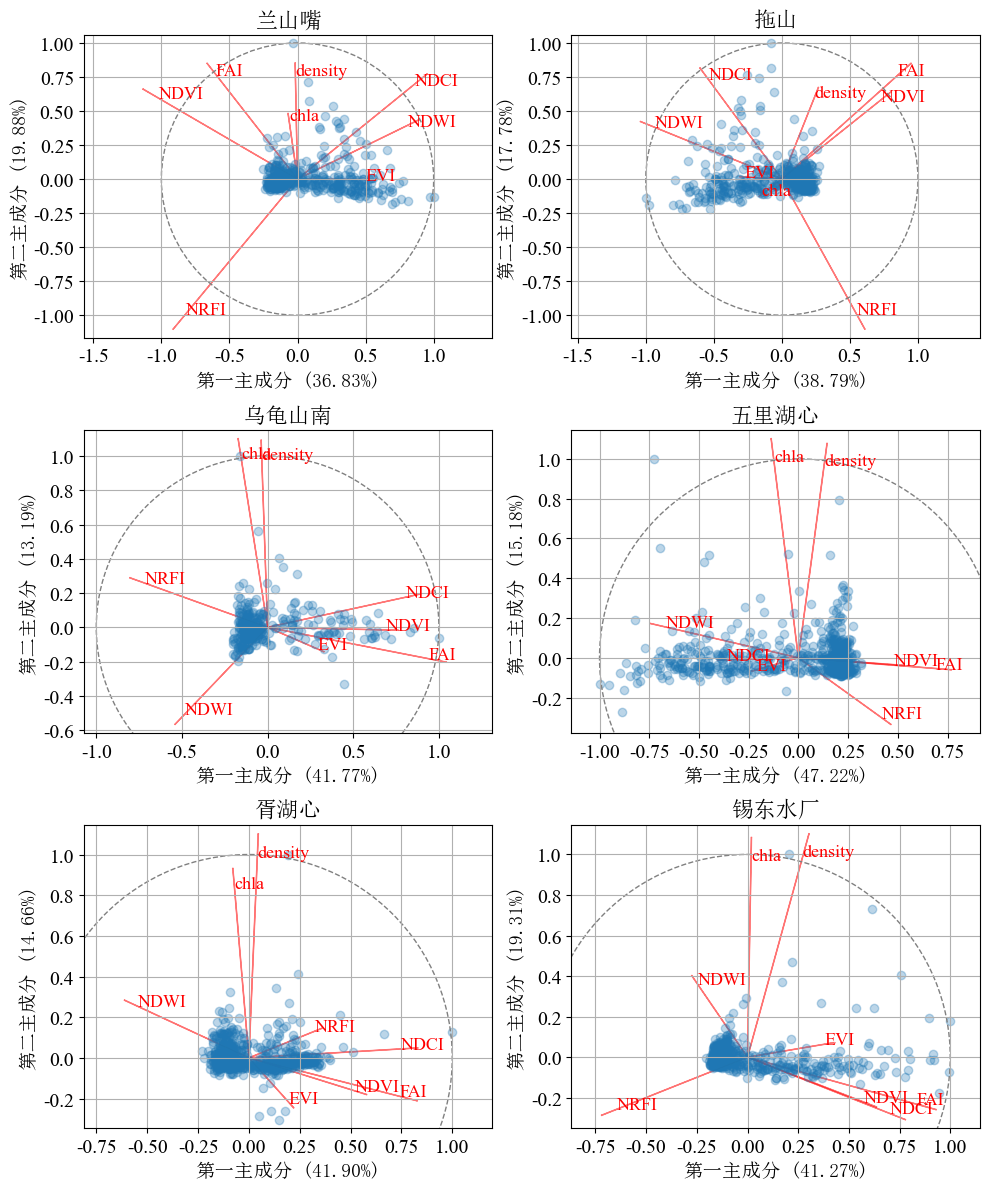


波段PCA双标图分析:
兰山嘴
拖山
乌龟山南
五里湖心
胥湖心
锡东水厂


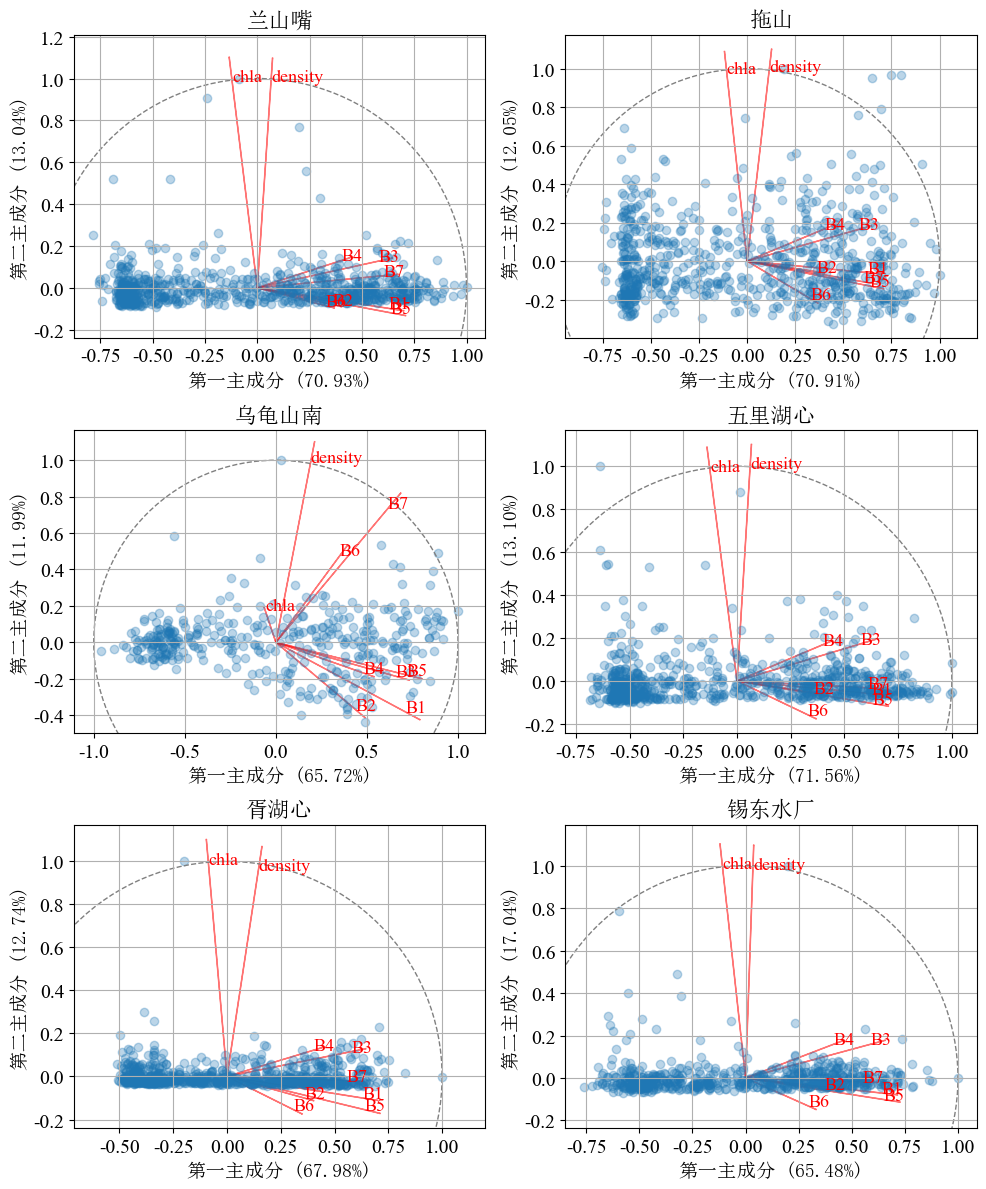

In [4]:
# 进行PCA分析
# 分别定义三组变量
water_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 'conductivity', 'turbidity','density', 'chla']
index_vars = ['density', 'chla', 'NDCI', 'NDVI', 'EVI', 'NDWI', 'FAI', 'NRFI']
band_vars = ['density', 'chla', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']

# 定义每个变量的偏移量
water_offsets = {
    'temperature': (0.1, 0.1),
    'pH': (-0.1, 0.1), 
    'oxygen': (0.15, -0.1),
    'permanganate': (-0.15, -0.1),
    'NH': (0.1, 0.15),
    'TP': (-0.1, 0.15),
    'TN': (0.15, -0.15),
    'conductivity': (-0.15, -0.15),
    'turbidity': (0.2, 0),
    'density': (-0.2, 0),
    'chla': (0, 0.2)
}

index_offsets = {
    'density': (0.1, 0.1),
    'chla': (-0.1, 0.1),
    'NDCI': (0.15, -0.1),
    'NDVI': (-0.15, -0.1),
    'EVI': (0.1, 0.15),
    'NDWI': (-0.1, 0.15),
    'FAI': (0.15, -0.15),
    'NRFI': (-0.15, -0.15)
}

band_offsets = {
    'density': (0.1, 0.1),
    'chla': (-0.1, 0.1),
    'B1': (0.15, -0.1),
    'B2': (-0.15, -0.1),
    'B3': (0.1, 0.15),
    'B4': (-0.1, 0.15),
    'B5': (0.15, -0.15),
    'B6': (-0.15, -0.15),
    'B7': (0.2, 0)
}

# 定义列名映射
column_mapping = {
    'ndci': 'NDCI',
    'ndvi': 'NDVI', 
    'evi': 'EVI',
    'ndwi': 'NDWI',
    'fai': 'FAI',
    'nrfi': 'NRFI',
    'b1': 'B1',
    'b2': 'B2', 
    'b3': 'B3',
    'b4': 'B4',
    'b5': 'B5',
    'b6': 'B6',
    'b7': 'B7'
}

# 对三组变量分别进行PCA分析和可视化
for vars_group, group_name, offsets in [(water_vars, '水质参数', water_offsets), 
                                      (index_vars, '遥感指数', index_offsets), 
                                      (band_vars, '波段', band_offsets)]:
    # 创建3x2的子图布局
    fig = plt.figure(figsize=(10, 12))
    
    print(f"\n{group_name}PCA双标图分析:")
    for station_idx, station in enumerate(stations):
        print(f"{station}")
        
        # 准备该站点的数据
        station_df = merged_df[merged_df['station'] == station]
        # 重命名列
        station_df = station_df.rename(columns=column_mapping)
        X = station_df[vars_group].dropna()
        X_scaled = StandardScaler().fit_transform(X)
        
        # 执行PCA
        pca = PCA()
        pca_result = pca.fit_transform(X_scaled)
        
        # 计算解释方差比例
        explained_variance_ratio = pca.explained_variance_ratio_
        
        # 创建子图
        plt.subplot(3, 2, station_idx + 1)
        scale = np.max(np.abs(pca.components_[:2]))
        
        # 绘制变量向量
        for i, var in enumerate(vars_group):
            # 获取偏移量
            offset_x, offset_y = offsets[var]
            
            # 计算带偏移的箭头终点
            end_x = pca.components_[0, i] / scale + offset_x
            end_y = pca.components_[1, i] / scale + offset_y
            
            plt.arrow(0, 0, end_x, end_y, color='r', alpha=0.5)
            plt.text(end_x * 0.9, end_y * 0.9,
                    var, color='r', fontproperties=english_font, fontsize=13)
        
        # 绘制样本点
        plt.scatter(pca_result[:, 0] / np.max(np.abs(pca_result[:, 0])),
                    pca_result[:, 1] / np.max(np.abs(pca_result[:, 1])),
                    alpha=0.3)
        
        # 添加标题和轴标签
        plt.title(f'{station}', fontproperties=chinese_font, fontsize=16)
        plt.xlabel(f'第一主成分 ({explained_variance_ratio[0]:.2%})', fontproperties=chinese_font, fontsize=14)
        plt.ylabel(f'第二主成分 ({explained_variance_ratio[1]:.2%})', fontproperties=chinese_font, fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
            label.set_fontproperties(english_font)
        
        # 添加单位圆
        circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
        plt.gca().add_artist(circle)
        plt.axis('equal')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

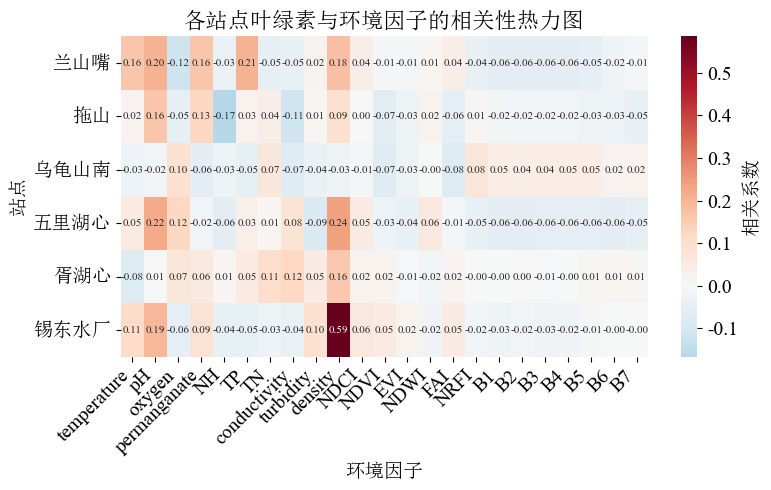

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

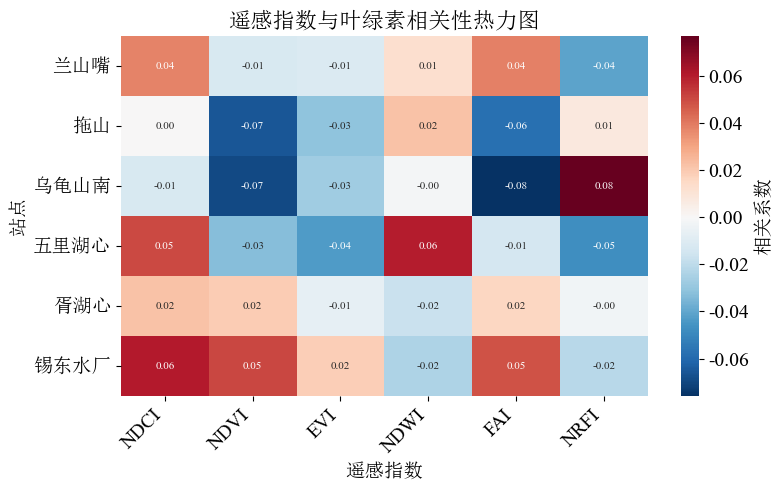

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 读取6个站点的数据
stations = ['兰山嘴', '拖山', '乌龟山南', '五里湖心', '胥湖心', '锡东水厂']
dfs = []
for station in stations:
    filename = f'004-MOD09GA-station-merged-异常nan_{station}.csv'
    df = pd.read_csv(filename)
    df['station'] = station  # 添加站点标识列
    dfs.append(df)

# 合并所有数据
merged_df = pd.concat(dfs, axis=0, ignore_index=True)

# 定义列名映射
column_mapping = {
    'ndci': 'NDCI',
    'ndvi': 'NDVI', 
    'evi': 'EVI',
    'ndwi': 'NDWI',
    'fai': 'FAI',
    'nrfi': 'NRFI',
    'b1': 'B1',
    'b2': 'B2', 
    'b3': 'B3',
    'b4': 'B4',
    'b5': 'B5',
    'b6': 'B6',
    'b7': 'B7'
}

# 计算每个站点的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density', 'ndci', 'ndvi', 'evi', 'ndwi', 'fai', 'nrfi',
                   'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7']

# 创建显示用的列名列表
display_vars = []
for var in correlation_vars:
    if var in column_mapping:
        display_vars.append(column_mapping[var])
    else:
        display_vars.append(var)

# 创建一个空的DataFrame来存储每个站点的相关性
station_correlations = pd.DataFrame(index=stations, columns=correlation_vars)

# 计算每个站点的相关性并确保数据为数值型
for station in stations:
    station_data = merged_df[merged_df['station'] == station]
    numeric_data = station_data[correlation_vars + ['chla']].apply(pd.to_numeric, errors='coerce')
    correlations = numeric_data.corr()['chla']
    station_correlations.loc[station] = correlations[correlation_vars]

# 确保所有数据都是浮点数
station_correlations = station_correlations.astype(float)

# 创建热力图
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(station_correlations,
            cmap='RdBu_r', 
            center=0,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': '相关系数'},
            xticklabels=display_vars,
            yticklabels=stations,
            annot_kws={'fontproperties': english_font, 'size': 8})

plt.title('各站点叶绿素与环境因子的相关性热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('环境因子', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)

# 调整x轴标签的角度
plt.xticks(rotation=45, ha='right')
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)  # 设置y轴标签为水平方向

# 设置colorbar的字体
cbar = heatmap.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()

# 计算遥感指数与叶绿素的相关性
rs_vars = ['ndci', 'ndvi', 'evi', 'ndwi', 'fai', 'nrfi']
rs_display_vars = [column_mapping[var] for var in rs_vars]
rs_correlations = pd.DataFrame(index=stations, columns=rs_vars)

for station in stations:
    station_data = merged_df[merged_df['station'] == station]
    numeric_data = station_data[rs_vars + ['chla']].apply(pd.to_numeric, errors='coerce')
    correlations = numeric_data.corr()['chla']
    rs_correlations.loc[station] = correlations[rs_vars]

# 确保数据为浮点型
rs_correlations = rs_correlations.astype(float)

# 可视化遥感指数相关性热力图
plt.figure(figsize=(8, 5))
heatmap1 = sns.heatmap(rs_correlations,
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': '相关系数'},
            xticklabels=rs_display_vars,
            yticklabels=stations,
            annot_kws={'fontproperties': english_font, 'size': 8})

plt.title('遥感指数与叶绿素相关性热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('遥感指数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)

# 调整标签
plt.xticks(rotation=45, ha='right')
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)  # 设置y轴标签为水平方向

# 设置colorbar的字体
cbar = heatmap1.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

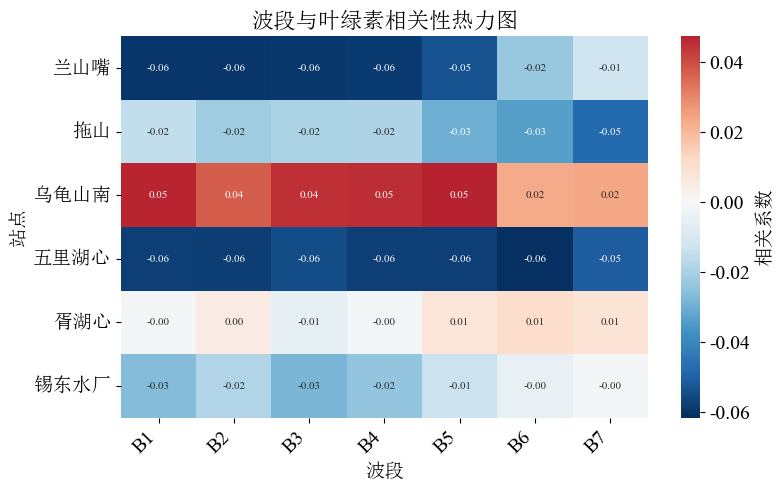

In [6]:
# 计算波段与叶绿素的相关性
band_vars = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7']
band_display_vars = [column_mapping[var] for var in band_vars]
band_correlations = pd.DataFrame(index=stations, columns=band_vars)
for station in stations:
    station_data = merged_df[merged_df['station'] == station]
    numeric_data = station_data[band_vars + ['chla']].apply(pd.to_numeric, errors='coerce')
    correlations = numeric_data.corr()['chla']
    band_correlations.loc[station] = correlations[band_vars]
# 确保数据为浮点型
band_correlations = band_correlations.astype(float)

# 可视化波段相关性热力图
plt.figure(figsize=(8, 5))
heatmap2 = sns.heatmap(band_correlations,
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f', 
            cbar_kws={'label': '相关系数'},
            xticklabels=band_display_vars,
            yticklabels=stations,
            annot_kws={'fontproperties': english_font, 'size': 8})

plt.title('波段与叶绿素相关性热力图', fontproperties=chinese_font, fontsize=16)
plt.xlabel('波段', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)

# 调整标签
plt.xticks(rotation=45, ha='right')
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)  # 设置y轴标签为水平方向

# 设置colorbar的字体
cbar = heatmap2.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()


遥感指数与藻密度的滞后相关性(1-30天)


/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

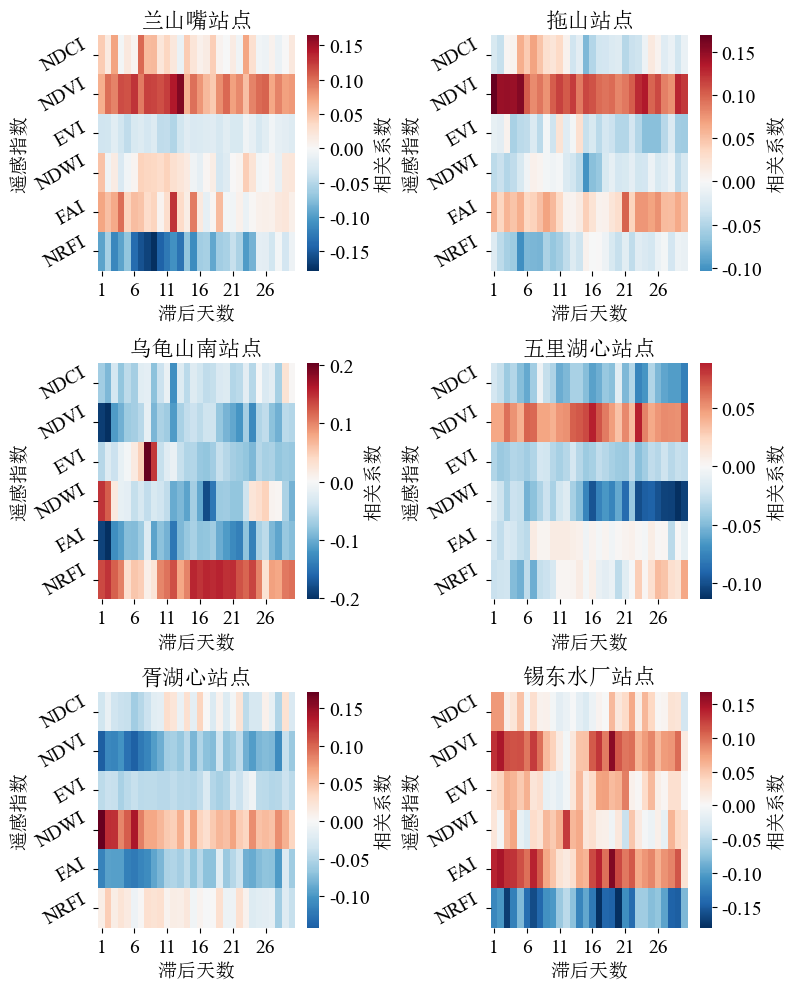

波段与藻密度的滞后相关性(1-30天)


/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

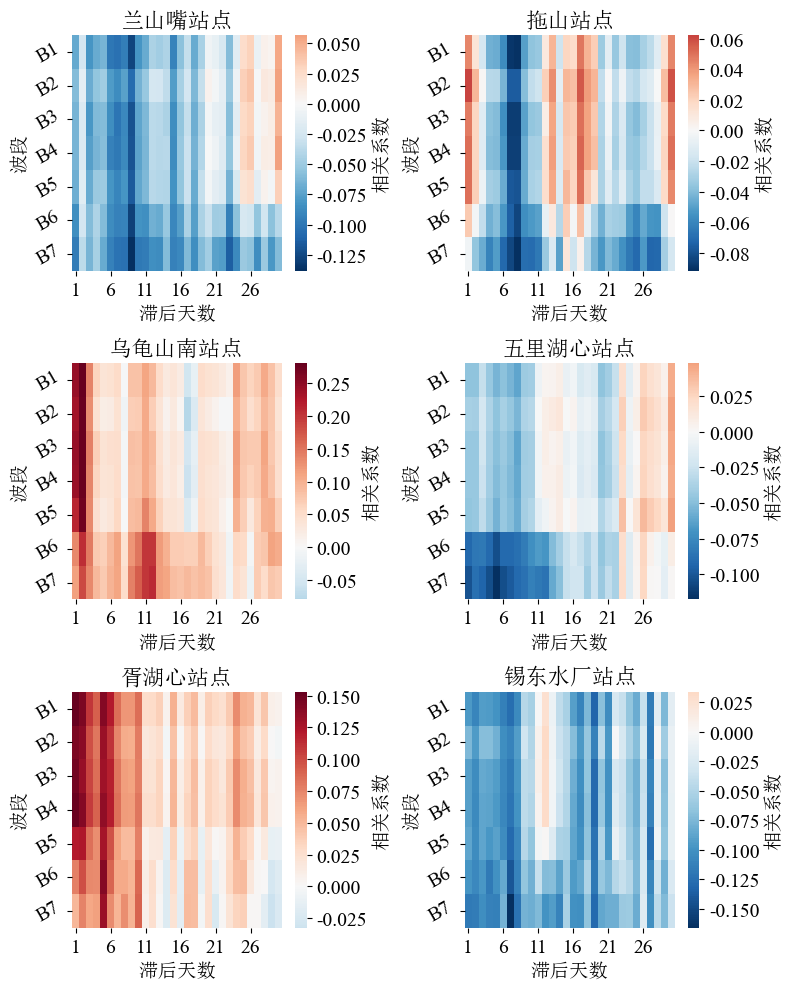

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 定义遥感指数和波段变量
rs_vars = ['ndci', 'ndvi', 'evi', 'ndwi', 'fai', 'nrfi']
band_vars = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7']

# 定义列名映射
column_mapping = {
    'ndci': 'NDCI',
    'ndvi': 'NDVI', 
    'evi': 'EVI',
    'ndwi': 'NDWI',
    'fai': 'FAI',
    'nrfi': 'NRFI',
    'b1': 'B1',
    'b2': 'B2', 
    'b3': 'B3',
    'b4': 'B4',
    'b5': 'B5',
    'b6': 'B6',
    'b7': 'B7'
}

# 计算滞后相关性
max_lag = 30  # 最大滞后天数

print("遥感指数与藻密度的滞后相关性(1-30天)")

# 创建3x2的子图布局
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()

# 为每个站点计算和绘制滞后相关性
for idx, station in enumerate(stations):
    station_data = merged_df[merged_df['station'] == station]
    
    # 遥感指数的滞后相关性分析
    rs_lag_correlations = {}
    for var in rs_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = station_data[var].shift(lag).corr(station_data['density'])
            lag_corrs.append(lagged_corr)
        rs_lag_correlations[column_mapping[var]] = lag_corrs

    # 绘制遥感指数滞后相关性热力图
    rs_lag_data = pd.DataFrame(rs_lag_correlations, index=range(1, max_lag + 1))
    heatmap = sns.heatmap(rs_lag_data.T, cmap='RdBu_r', center=0,
                xticklabels=5,
                cbar_kws={'label': '相关系数'},
                ax=axes[idx])
    axes[idx].set_title(f'{station}站点', 
                       fontproperties=chinese_font, fontsize=16)
    axes[idx].set_xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
    axes[idx].set_ylabel('遥感指数', fontproperties=chinese_font, fontsize=14)
    axes[idx].tick_params(axis='both', which='major', labelsize=12)
    for label in axes[idx].get_xticklabels():
        label.set_fontproperties(english_font)
    for label in axes[idx].get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_rotation(30)  # 设置y轴标签倾斜30度
    
    # 设置colorbar字体
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
    for label in cbar.ax.get_yticklabels():
        label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()

print("波段与藻密度的滞后相关性(1-30天)")

# 创建3x2的子图布局
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()

# 为每个站点计算和绘制波段滞后相关性
for idx, station in enumerate(stations):
    station_data = merged_df[merged_df['station'] == station]
    
    # 波段的滞后相关性分析
    band_lag_correlations = {}
    for var in band_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = station_data[var].shift(lag).corr(station_data['density'])
            lag_corrs.append(lagged_corr)
        band_lag_correlations[column_mapping[var]] = lag_corrs
    
    # 绘制波段滞后相关性热力图
    band_lag_data = pd.DataFrame(band_lag_correlations, index=range(1, max_lag + 1))
    heatmap = sns.heatmap(band_lag_data.T, cmap='RdBu_r', center=0,
                xticklabels=5,
                cbar_kws={'label': '相关系数'},
                ax=axes[idx])
    axes[idx].set_title(f'{station}站点', 
                       fontproperties=chinese_font, fontsize=16)
    axes[idx].set_xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
    axes[idx].set_ylabel('波段', fontproperties=chinese_font, fontsize=14)
    axes[idx].tick_params(axis='both', which='major', labelsize=12)
    for label in axes[idx].get_xticklabels():
        label.set_fontproperties(english_font)
    for label in axes[idx].get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_rotation(30)  # 设置y轴标签倾斜30度
        
    # 设置colorbar字体
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
    for label in cbar.ax.get_yticklabels():
        label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()



兰山嘴站点遥感指数的最大滞后相关性及对应滞后天数:
NDCI: 相关系数 = 0.103, 滞后天数 = 7
NDVI: 相关系数 = 0.165, 滞后天数 = 13
EVI: 相关系数 = -0.053, 滞后天数 = 12
NDWI: 相关系数 = 0.051, 滞后天数 = 1
FAI: 相关系数 = 0.128, 滞后天数 = 12
NRFI: 相关系数 = -0.179, 滞后天数 = 9

兰山嘴站点波段的最大滞后相关性及对应滞后天数:
B1: 相关系数 = -0.127, 滞后天数 = 9
B2: 相关系数 = -0.107, 滞后天数 = 9
B3: 相关系数 = -0.120, 滞后天数 = 9
B4: 相关系数 = -0.119, 滞后天数 = 9
B5: 相关系数 = -0.116, 滞后天数 = 9
B6: 相关系数 = -0.129, 滞后天数 = 9
B7: 相关系数 = -0.138, 滞后天数 = 9

拖山站点遥感指数的最大滞后相关性及对应滞后天数:
NDCI: 相关系数 = 0.068, 滞后天数 = 7
NDVI: 相关系数 = 0.170, 滞后天数 = 1
EVI: 相关系数 = -0.055, 滞后天数 = 4
NDWI: 相关系数 = -0.049, 滞后天数 = 3
FAI: 相关系数 = 0.067, 滞后天数 = 9
NRFI: 相关系数 = -0.104, 滞后天数 = 5

拖山站点波段的最大滞后相关性及对应滞后天数:
B1: 相关系数 = -0.090, 滞后天数 = 8
B2: 相关系数 = -0.076, 滞后天数 = 8
B3: 相关系数 = -0.087, 滞后天数 = 8
B4: 相关系数 = -0.086, 滞后天数 = 8
B5: 相关系数 = -0.079, 滞后天数 = 8
B6: 相关系数 = -0.084, 滞后天数 = 8
B7: 相关系数 = -0.092, 滞后天数 = 8

乌龟山南站点遥感指数的最大滞后相关性及对应滞后天数:
NDCI: 相关系数 = -0.090, 滞后天数 = 2
NDVI: 相关系数 = -0.201, 滞后天数 = 2
EVI: 相关系数 = 0.202, 滞后天数 = 8
NDWI: 相关系数 = 0.147, 滞后天数 = 1
FAI: 相关系数

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

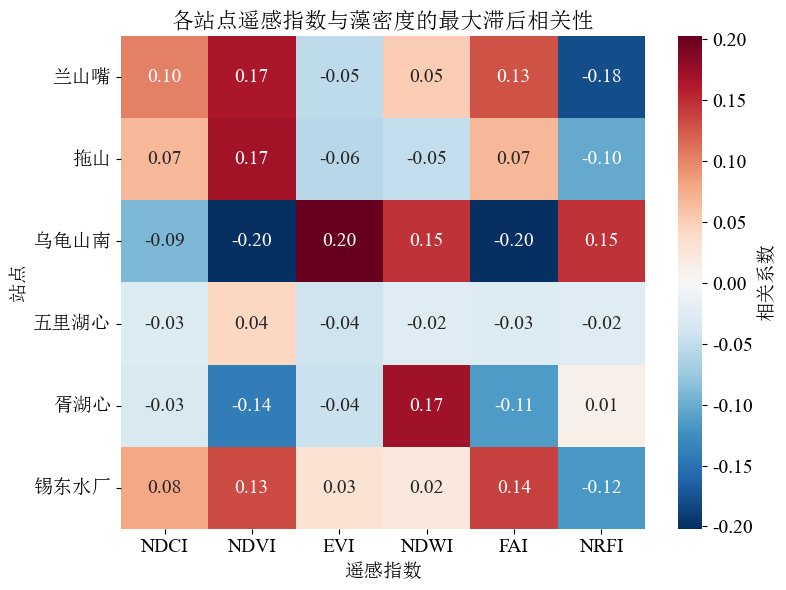

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

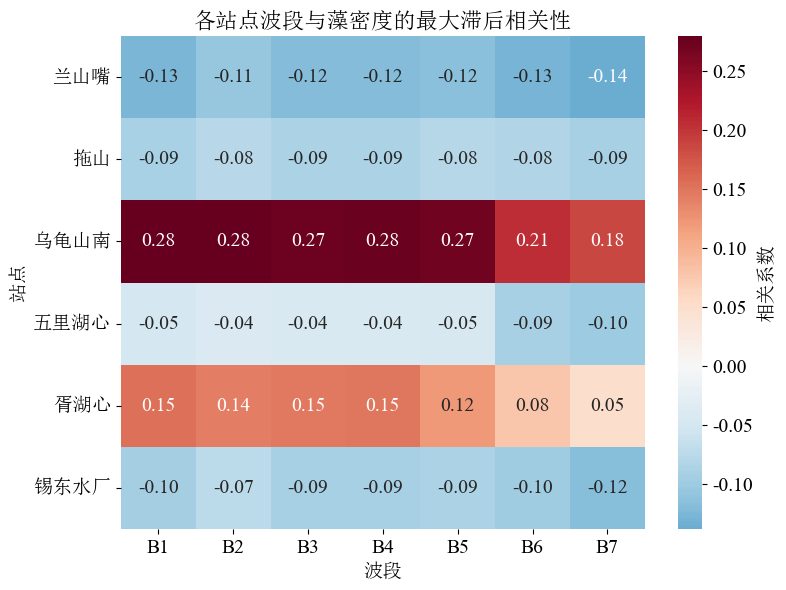

In [8]:
# 为每个站点找出遥感指数的最大滞后相关性
rs_max_lag_correlations_all = {}
band_max_lag_correlations_all = {}

column_mapping = {
    'ndci': 'NDCI',
    'ndvi': 'NDVI', 
    'evi': 'EVI',
    'ndwi': 'NDWI',
    'fai': 'FAI',
    'nrfi': 'NRFI',
    'b1': 'B1',
    'b2': 'B2', 
    'b3': 'B3',
    'b4': 'B4',
    'b5': 'B5',
    'b6': 'B6',
    'b7': 'B7'
}

for station in stations:
    station_data = merged_df[merged_df['station'] == station]
    
    # 遥感指数的滞后相关性分析
    rs_lag_correlations = {}
    for var in rs_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = station_data[var].shift(lag).corr(station_data['density'])
            lag_corrs.append(lagged_corr)
        rs_lag_correlations[var] = lag_corrs

    # 波段的滞后相关性分析  
    band_lag_correlations = {}
    for var in band_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = station_data[var].shift(lag).corr(station_data['density'])
            lag_corrs.append(lagged_corr)
        band_lag_correlations[var] = lag_corrs

    # 找出遥感指数的最大滞后相关性
    rs_max_lag_correlations = {}
    for var in rs_vars:
        max_corr = max(rs_lag_correlations[var], key=abs)
        max_lag = rs_lag_correlations[var].index(max_corr) + 1
        rs_max_lag_correlations[var] = (max_corr, max_lag)
    rs_max_lag_correlations_all[station] = rs_max_lag_correlations

    # 找出波段的最大滞后相关性
    band_max_lag_correlations = {}
    for var in band_vars:
        max_corr = max(band_lag_correlations[var], key=abs)
        max_lag = band_lag_correlations[var].index(max_corr) + 1
        band_max_lag_correlations[var] = (max_corr, max_lag)
    band_max_lag_correlations_all[station] = band_max_lag_correlations

    print(f"\n{station}站点遥感指数的最大滞后相关性及对应滞后天数:")
    for var, (corr, lag) in rs_max_lag_correlations.items():
        print(f"{column_mapping[var]}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

    print(f"\n{station}站点波段的最大滞后相关性及对应滞后天数:")
    for var, (corr, lag) in band_max_lag_correlations.items():
        print(f"{column_mapping[var]}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 创建热力图数据
rs_heatmap_data = pd.DataFrame(index=stations, columns=[column_mapping[var] for var in rs_vars])
for station in stations:
    for var in rs_vars:
        rs_heatmap_data.loc[station, column_mapping[var]] = float(rs_max_lag_correlations_all[station][var][0])

# 绘制遥感指数最大滞后相关性热力图
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(rs_heatmap_data.astype(float), 
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            annot_kws={'font_properties': english_font},
            cbar_kws={'label': '相关系数'},
            xticklabels=[column_mapping[var] for var in rs_vars],
            yticklabels=stations)

# 设置colorbar的字体
cbar = heatmap.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_font_properties(english_font)

plt.title('各站点遥感指数与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('遥感指数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)
plt.tight_layout()
plt.show()

# 创建波段热力图数据
band_heatmap_data = pd.DataFrame(index=stations, columns=[column_mapping[var] for var in band_vars])
for station in stations:
    for var in band_vars:
        band_heatmap_data.loc[station, column_mapping[var]] = float(band_max_lag_correlations_all[station][var][0])

# 绘制波段最大滞后相关性热力图
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(band_heatmap_data.astype(float),
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            annot_kws={'font_properties': english_font},
            cbar_kws={'label': '相关系数'},
            xticklabels=[column_mapping[var] for var in band_vars],
            yticklabels=stations)

# 设置colorbar的字体
cbar = heatmap.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_font_properties(english_font)

plt.title('各站点波段与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('波段', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)
plt.tight_layout()
plt.show()

遥感指数与叶绿素的滞后相关性(1-30天)


/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

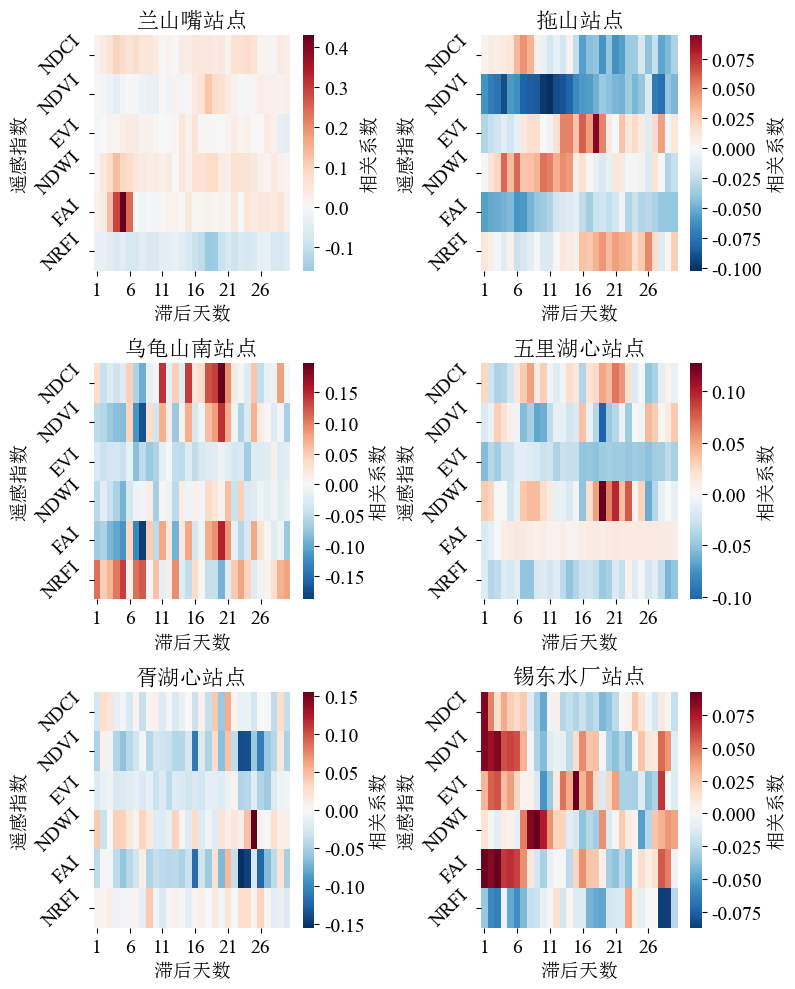

波段与叶绿素的滞后相关性(1-30天)


/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

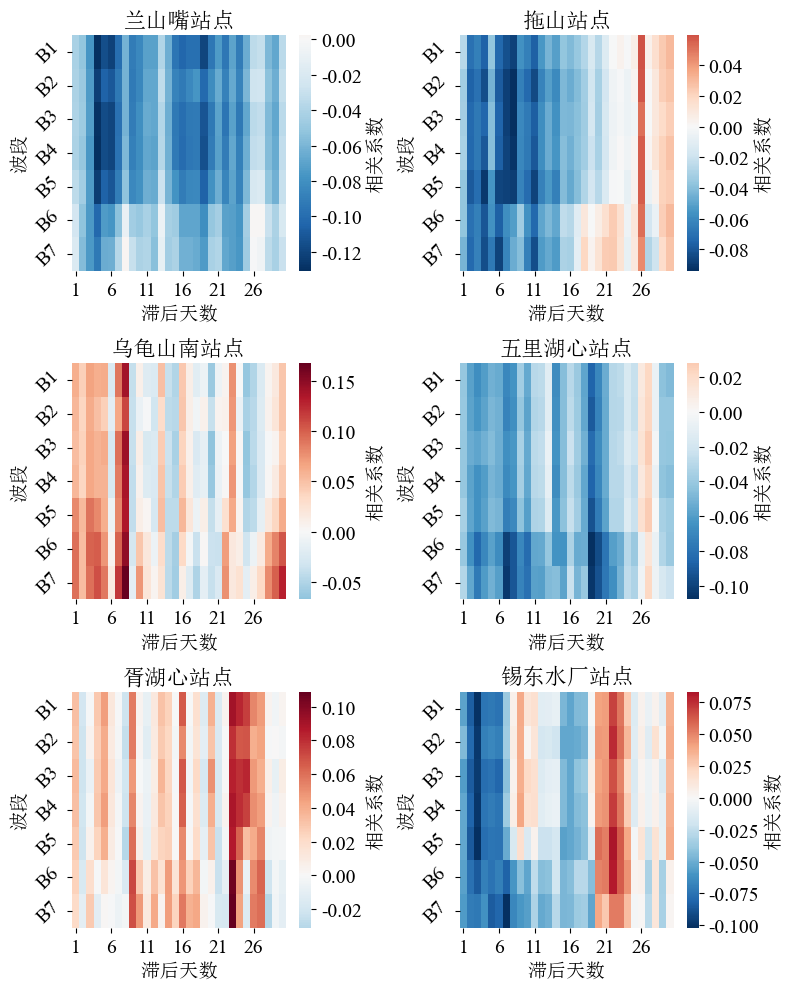

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体,并设置较大字号
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 定义遥感指数和波段变量
rs_vars = ['ndci', 'ndvi', 'evi', 'ndwi', 'fai', 'nrfi']
band_vars = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7']

# 定义列名映射
column_mapping = {
    'ndci': 'NDCI',
    'ndvi': 'NDVI', 
    'evi': 'EVI',
    'ndwi': 'NDWI',
    'fai': 'FAI',
    'nrfi': 'NRFI',
    'b1': 'B1',
    'b2': 'B2', 
    'b3': 'B3',
    'b4': 'B4',
    'b5': 'B5',
    'b6': 'B6',
    'b7': 'B7'
}

# 计算滞后相关性
max_lag = 30  # 最大滞后天数

print("遥感指数与叶绿素的滞后相关性(1-30天)")

# 创建3x2的子图布局
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()

# 为每个站点计算和绘制滞后相关性
for idx, station in enumerate(stations):
    station_data = merged_df[merged_df['station'] == station]
    
    # 遥感指数的滞后相关性分析
    rs_lag_correlations = {}
    for var in rs_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = station_data[var].shift(lag).corr(station_data['chla'])
            lag_corrs.append(lagged_corr)
        rs_lag_correlations[column_mapping[var]] = lag_corrs

    # 绘制遥感指数滞后相关性热力图
    rs_lag_data = pd.DataFrame(rs_lag_correlations, index=range(1, max_lag + 1))
    heatmap = sns.heatmap(rs_lag_data.T, cmap='RdBu_r', center=0,
                xticklabels=5,
                cbar_kws={'label': '相关系数'},
                ax=axes[idx])
    axes[idx].set_title(f'{station}站点', 
                       fontproperties=chinese_font, fontsize=16)
    axes[idx].set_xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
    axes[idx].set_ylabel('遥感指数', fontproperties=chinese_font, fontsize=14)
    axes[idx].tick_params(axis='both', which='major', labelsize=12)
    for label in axes[idx].get_xticklabels():
        label.set_fontproperties(english_font)
    for label in axes[idx].get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_rotation(45)  # 将Y轴刻度旋转45度
    
    # 设置colorbar字体
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
    for label in cbar.ax.get_yticklabels():
        label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()

print("波段与叶绿素的滞后相关性(1-30天)")

# 创建3x2的子图布局
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
axes = axes.flatten()

# 为每个站点计算和绘制波段滞后相关性
for idx, station in enumerate(stations):
    station_data = merged_df[merged_df['station'] == station]
    
    # 波段的滞后相关性分析
    band_lag_correlations = {}
    for var in band_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = station_data[var].shift(lag).corr(station_data['chla'])
            lag_corrs.append(lagged_corr)
        band_lag_correlations[column_mapping[var]] = lag_corrs
    
    # 绘制波段滞后相关性热力图
    band_lag_data = pd.DataFrame(band_lag_correlations, index=range(1, max_lag + 1))
    heatmap = sns.heatmap(band_lag_data.T, cmap='RdBu_r', center=0,
                xticklabels=5,
                cbar_kws={'label': '相关系数'},
                ax=axes[idx])
    axes[idx].set_title(f'{station}站点', 
                       fontproperties=chinese_font, fontsize=16)
    axes[idx].set_xlabel('滞后天数', fontproperties=chinese_font, fontsize=14)
    axes[idx].set_ylabel('波段', fontproperties=chinese_font, fontsize=14)
    axes[idx].tick_params(axis='both', which='major', labelsize=12)
    for label in axes[idx].get_xticklabels():
        label.set_fontproperties(english_font)
    for label in axes[idx].get_yticklabels():
        label.set_fontproperties(english_font)
        label.set_rotation(45)  # 将Y轴刻度旋转45度
        
    # 设置colorbar字体
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('相关系数', fontproperties=chinese_font, fontsize=14)
    for label in cbar.ax.get_yticklabels():
        label.set_fontproperties(english_font)

plt.tight_layout()
plt.show()



兰山嘴站点遥感指数的最大滞后相关性及对应滞后天数:
NDCI: 相关系数 = 0.101, 滞后天数 = 4
NDVI: 相关系数 = 0.121, 滞后天数 = 18
EVI: 相关系数 = 0.061, 滞后天数 = 16
NDWI: 相关系数 = 0.133, 滞后天数 = 4
FAI: 相关系数 = 0.431, 滞后天数 = 5
NRFI: 相关系数 = -0.160, 滞后天数 = 18

兰山嘴站点波段的最大滞后相关性及对应滞后天数:
B1: 相关系数 = -0.130, 滞后天数 = 4
B2: 相关系数 = -0.123, 滞后天数 = 4
B3: 相关系数 = -0.130, 滞后天数 = 4
B4: 相关系数 = -0.131, 滞后天数 = 4
B5: 相关系数 = -0.124, 滞后天数 = 4
B6: 相关系数 = -0.102, 滞后天数 = 4
B7: 相关系数 = -0.093, 滞后天数 = 4

拖山站点遥感指数的最大滞后相关性及对应滞后天数:
NDCI: 相关系数 = 0.009, 滞后天数 = 4
NDVI: 相关系数 = -0.091, 滞后天数 = 4
EVI: 相关系数 = -0.031, 滞后天数 = 1
NDWI: 相关系数 = 0.059, 滞后天数 = 4
FAI: 相关系数 = -0.056, 滞后天数 = 1
NRFI: 相关系数 = -0.012, 滞后天数 = 4

拖山站点波段的最大滞后相关性及对应滞后天数:
B1: 相关系数 = -0.076, 滞后天数 = 4
B2: 相关系数 = -0.083, 滞后天数 = 4
B3: 相关系数 = -0.075, 滞后天数 = 4
B4: 相关系数 = -0.079, 滞后天数 = 4
B5: 相关系数 = -0.091, 滞后天数 = 4
B6: 相关系数 = -0.080, 滞后天数 = 4
B7: 相关系数 = -0.083, 滞后天数 = 4

乌龟山南站点遥感指数的最大滞后相关性及对应滞后天数:
NDCI: 相关系数 = -0.045, 滞后天数 = 2
NDVI: 相关系数 = -0.082, 滞后天数 = 4
EVI: 相关系数 = -0.042, 滞后天数 = 2
NDWI: 相关系数 = -0.063, 滞后天数 = 4
FAI: 相关

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

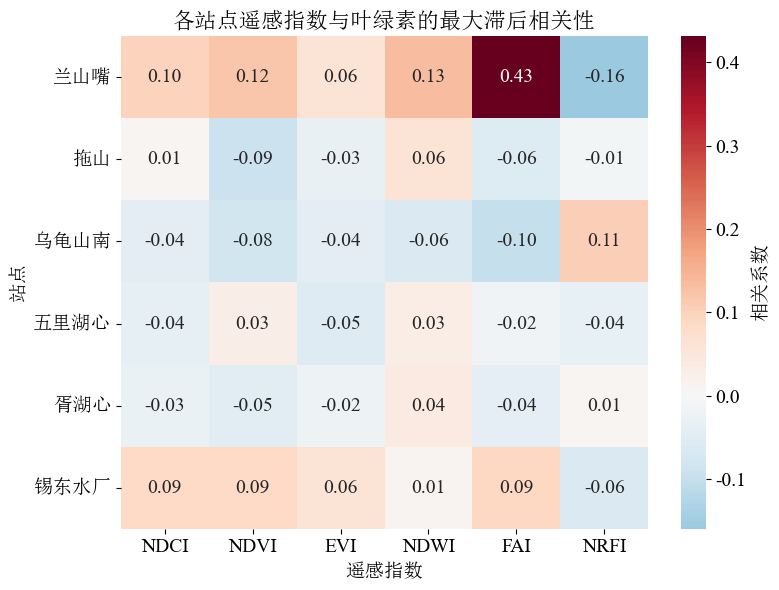

/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20848 (\N{CJK UNIFIED IDEOGRAPH-5170}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22068 (\N{CJK UNIFIED IDEOGRAPH-5634}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25302 (\N{CJK UNIFIED IDEOGRAPH-62D6}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  fig.canvas.draw()
/root/.conda/envs/hydro/envs/aie-sdk/lib

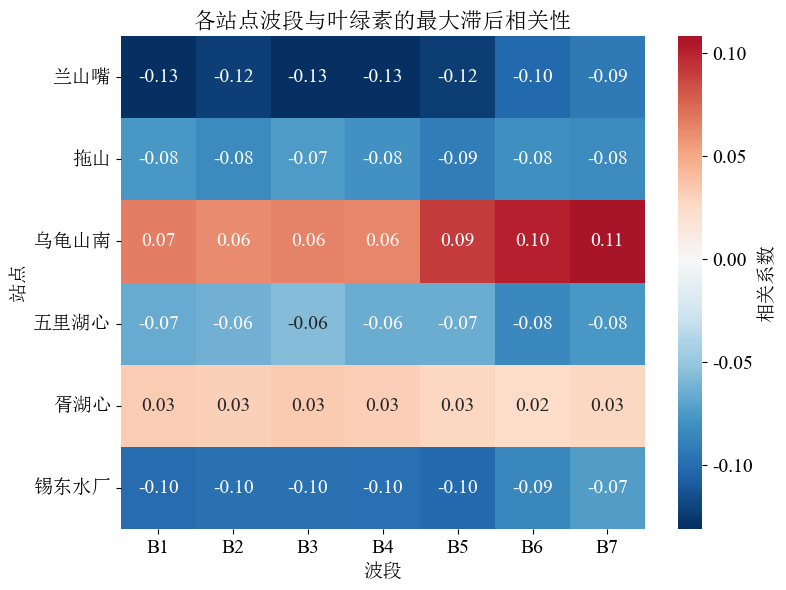

In [10]:
# 为每个站点找出遥感指数的最大滞后相关性
rs_max_lag_correlations_all = {}
band_max_lag_correlations_all = {}

for station in stations:
    station_data = merged_df[merged_df['station'] == station]
    
    # 遥感指数的滞后相关性分析
    rs_lag_correlations = {}
    for var in rs_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = station_data[var].shift(lag).corr(station_data['chla'])
            lag_corrs.append(lagged_corr)
        rs_lag_correlations[var] = lag_corrs

    # 波段的滞后相关性分析  
    band_lag_correlations = {}
    for var in band_vars:
        lag_corrs = []
        for lag in range(1, max_lag + 1):
            lagged_corr = station_data[var].shift(lag).corr(station_data['chla'])
            lag_corrs.append(lagged_corr)
        band_lag_correlations[var] = lag_corrs

    # 找出遥感指数的最大滞后相关性
    rs_max_lag_correlations = {}
    for var in rs_vars:
        max_corr = max(rs_lag_correlations[var], key=abs)
        max_lag = rs_lag_correlations[var].index(max_corr) + 1
        rs_max_lag_correlations[var] = (max_corr, max_lag)
    rs_max_lag_correlations_all[station] = rs_max_lag_correlations

    # 找出波段的最大滞后相关性
    band_max_lag_correlations = {}
    for var in band_vars:
        max_corr = max(band_lag_correlations[var], key=abs)
        max_lag = band_lag_correlations[var].index(max_corr) + 1
        band_max_lag_correlations[var] = (max_corr, max_lag)
    band_max_lag_correlations_all[station] = band_max_lag_correlations

    print(f"\n{station}站点遥感指数的最大滞后相关性及对应滞后天数:")
    for var, (corr, lag) in rs_max_lag_correlations.items():
        print(f"{column_mapping[var]}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

    print(f"\n{station}站点波段的最大滞后相关性及对应滞后天数:")
    for var, (corr, lag) in band_max_lag_correlations.items():
        print(f"{column_mapping[var]}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 创建热力图数据
rs_heatmap_data = pd.DataFrame(index=stations, columns=[column_mapping[var] for var in rs_vars])
for station in stations:
    for var in rs_vars:
        rs_heatmap_data.loc[station, column_mapping[var]] = float(rs_max_lag_correlations_all[station][var][0])

# 绘制遥感指数最大滞后相关性热力图
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(rs_heatmap_data.astype(float), 
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            annot_kws={'font_properties': english_font},
            cbar_kws={'label': '相关系数'},
            xticklabels=[column_mapping[var] for var in rs_vars],
            yticklabels=stations)

# 设置colorbar的字体
cbar = heatmap.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_font_properties(english_font)

plt.title('各站点遥感指数与叶绿素的最大滞后相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('遥感指数', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)
plt.tight_layout()
plt.show()

# 创建波段热力图数据
band_heatmap_data = pd.DataFrame(index=stations, columns=[column_mapping[var] for var in band_vars])
for station in stations:
    for var in band_vars:
        band_heatmap_data.loc[station, column_mapping[var]] = float(band_max_lag_correlations_all[station][var][0])

# 绘制波段最大滞后相关性热力图
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(band_heatmap_data.astype(float),
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            annot_kws={'font_properties': english_font},
            cbar_kws={'label': '相关系数'},
            xticklabels=[column_mapping[var] for var in band_vars],
            yticklabels=stations)

# 设置colorbar的字体
cbar = heatmap.collections[0].colorbar
cbar.set_label('相关系数', fontproperties=chinese_font)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_font_properties(english_font)

plt.title('各站点波段与叶绿素的最大滞后相关性', fontproperties=chinese_font, fontsize=16)
plt.xlabel('波段', fontproperties=chinese_font, fontsize=14)
plt.ylabel('站点', fontproperties=chinese_font, fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
for label in plt.gca().get_xticklabels():
    label.set_fontproperties(english_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(chinese_font)
    label.set_rotation(0)
plt.tight_layout()
plt.show()